In [1]:
import requests
import pandas as pd
import numpy as np
import io

# Your file id (replace with your actual file_id)
file_id = "1wx5xARwV83ejIzFi8mT9n3IjYK45fNm1"

# First request to get the confirmation prompt page
url = f"https://drive.google.com/uc?export=download&id={file_id}"
response = requests.get(url)

# In some cases, you might need to pass a confirmation token to download the file
# This depends on whether Google Drive presents a confirmation screen
confirm = None
for line in response.text.split('\n'):
    if "confirm=" in line:
        # Extract the confirmation token
        confirm = line.split('confirm=')[1].split('&')[0]
        break

# If we have a confirmation token, we need to append it to the URL
if confirm:
    url = f"https://drive.google.com/uc?export=download&id={file_id}&confirm={confirm}"
    response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # The output file name
    output = 'data_cleaned.pkl.gz'
    # Write the response content to a file (this will handle the gzip compression automatically)
    with open(output, "wb") as f:
        f.write(response.content)
    
    # Now, read the pickle file as a pandas DataFrame
    df = pd.read_pickle(output)
else:
    print("Failed to retrieve the data")

In [2]:
data = df.copy()

In [3]:
data.head() 

,searchDate,flightDate,startingAirport,destinationAirport,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds_Leg1,...,segmentsDurationInSeconds_Leg4,segmentsDistance_Leg1,segmentsDistance_Leg2,segmentsDistance_Leg3,segmentsDistance_Leg4,segmentsCabinCode_Leg1,segmentsCabinCode_Leg2,segmentsCabinCode_Leg3,segmentsCabinCode_Leg4,traveltime_hours
0,2022-04-16,2022-04-17,ATL,BOS,False,False,True,248.600006,947.0,1.650215e+09,...,0.0,947.0,0.0,0.0,0.0,coach,0,0,0,2.483333
1,2022-04-16,2022-04-17,ATL,BOS,False,False,True,248.600006,947.0,1.650191e+09,...,0.0,947.0,0.0,0.0,0.0,coach,0,0,0,2.500000
2,2022-04-16,2022-04-17,ATL,BOS,False,False,True,248.600006,947.0,1.650210e+09,...,0.0,947.0,0.0,0.0,0.0,coach,0,0,0,2.500000
3,2022-04-16,2022-04-17,ATL,BOS,False,False,True,248.600006,947.0,1.650218e+09,...,0.0,947.0,0.0,0.0,0.0,coach,0,0,0,2.533333
4,2022-04-16,2022-04-17,ATL,BOS,False,False,True,248.600006,947.0,1.650204e+09,...,0.0,947.0,0.0,0.0,0.0,coach,0,0,0,2.566667


In [4]:
data.tail()

,searchDate,flightDate,startingAirport,destinationAirport,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds_Leg1,...,segmentsDurationInSeconds_Leg4,segmentsDistance_Leg1,segmentsDistance_Leg2,segmentsDistance_Leg3,segmentsDistance_Leg4,segmentsCabinCode_Leg1,segmentsCabinCode_Leg2,segmentsCabinCode_Leg3,segmentsCabinCode_Leg4,traveltime_hours
13519994,2022-05-19,2022-06-03,SFO,PHL,False,False,False,836.599976,0.0,1.654261e+09,...,0.0,0.0,0.0,0.0,0.0,coach,coach,0,0,8.283333
13519995,2022-05-19,2022-06-03,SFO,PHL,False,False,False,837.599976,0.0,1.654258e+09,...,0.0,0.0,0.0,0.0,0.0,coach,coach,0,0,7.333333
13519996,2022-05-19,2022-06-03,SFO,PHL,False,False,False,837.599976,0.0,1.654287e+09,...,0.0,0.0,0.0,0.0,0.0,coach,coach,0,0,7.816667
13519997,2022-05-19,2022-06-03,SFO,PHL,False,False,False,837.599976,0.0,1.654267e+09,...,0.0,0.0,0.0,0.0,0.0,coach,coach,0,0,9.166667
13519998,2022-05-19,2022-06-03,SFO,PHL,False,False,True,1649.599976,0.0,1.654286e+09,...,0.0,0.0,0.0,0.0,0.0,coach,0,0,0,5.433333


In [5]:
data.shape

(13519999, 58)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 58 columns):
 #   Column                                  Dtype   
---  ------                                  -----   
 0   searchDate                              object  
 1   flightDate                              object  
 2   startingAirport                         category
 3   destinationAirport                      category
 4   isBasicEconomy                          bool    
 5   isRefundable                            bool    
 6   isNonStop                               bool    
 7   totalFare                               float32 
 8   totalTravelDistance                     float32 
 9   segmentsDepartureTimeEpochSeconds_Leg1  float32 
 10  segmentsDepartureTimeEpochSeconds_Leg2  float32 
 11  segmentsDepartureTimeEpochSeconds_Leg3  float32 
 12  segmentsDepartureTimeEpochSeconds_Leg4  float32 
 13  segmentsDepartureTimeRaw_Leg1           object  
 14  segmentsDepartur

In [7]:
data.describe()

,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds_Leg1,segmentsDepartureTimeEpochSeconds_Leg2,segmentsDepartureTimeEpochSeconds_Leg3,segmentsDepartureTimeEpochSeconds_Leg4,segmentsArrivalTimeEpochSeconds_Leg1,segmentsArrivalTimeEpochSeconds_Leg2,segmentsArrivalTimeEpochSeconds_Leg3,segmentsArrivalTimeEpochSeconds_Leg4,segmentsDurationInSeconds_Leg1,segmentsDurationInSeconds_Leg2,segmentsDurationInSeconds_Leg3,segmentsDurationInSeconds_Leg4,segmentsDistance_Leg1,segmentsDistance_Leg2,segmentsDistance_Leg3,segmentsDistance_Leg4,traveltime_hours
count,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.352000e+07,1.322207e+07
mean,3.752204e+02,1.438146e+03,1.928912e+09,1.300563e+09,1.211704e+08,4.614340e+06,1.928912e+09,1.300564e+09,1.211705e+08,4.614386e+06,9.756050e+03,6.684153e+03,5.215365e+02,1.703447e+01,8.578127e+02,5.567433e+02,4.324492e+01,1.229514e+00,6.967325e+00
std,2.058691e+02,8.993270e+02,2.692376e+08,7.278751e+08,4.177648e+08,8.711446e+07,2.692340e+08,7.278762e+08,4.177653e+08,8.711457e+07,4.501104e+03,5.553363e+03,1.975698e+03,3.261499e+02,6.710211e+02,6.513107e+02,1.874876e+02,2.491883e+01,3.683355e+00
min,2.397000e+01,0.000000e+00,1.650177e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.650187e+09,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.033333e+00
25%,2.235800e+02,7.330000e+02,1.652514e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.652527e+09,0.000000e+00,0.000000e+00,0.000000e+00,6.180000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.390000e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.133333e+00
50%,3.446000e+02,1.321000e+03,1.653666e+09,1.652725e+09,0.000000e+00,0.000000e+00,1.653676e+09,1.652735e+09,0.000000e+00,0.000000e+00,8.280000e+03,6.360000e+03,0.000000e+00,0.000000e+00,6.720000e+02,3.700000e+02,0.000000e+00,0.000000e+00,6.633333e+00
75%,4.876000e+02,2.305000e+03,1.655074e+09,1.654449e+09,0.000000e+00,0.000000e+00,1.655084e+09,1.654458e+09,0.000000e+00,0.000000e+00,1.170000e+04,9.840000e+03,0.000000e+00,0.000000e+00,1.177000e+03,8.480000e+02,0.000000e+00,0.000000e+00,9.333333e+00
max,8.260610e+03,4.430000e+03,1.658192e+09,1.658228e+09,1.658185e+09,1.658159e+09,1.658203e+09,1.658241e+09,1.658191e+09,1.658165e+09,3.990000e+04,3.510000e+04,2.466000e+04,1.956000e+04,2.722000e+03,2.722000e+03,2.722000e+03,2.458000e+03,2.398333e+01


# Exploratory Analyses (EDA)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Understanding the Target Variable

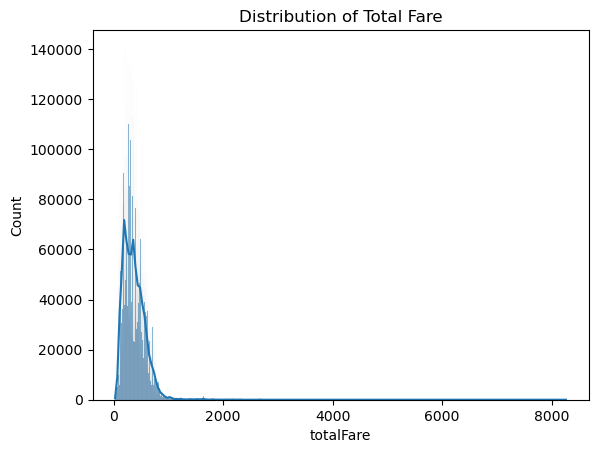

In [29]:
# Distribution of totalFare
sns.histplot(data['totalFare'], kde=True)
plt.title('Distribution of Total Fare')
plt.show()

- Distribution of the Target Variable ('Total Fare')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


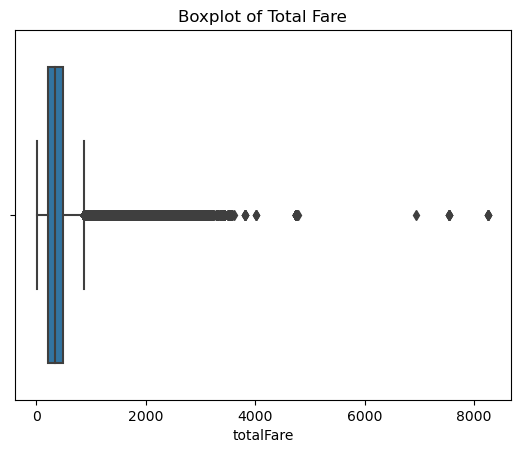

In [30]:
# Checking for outliers
sns.boxplot(data['totalFare'])
plt.title('Boxplot of Total Fare')
plt.show()

- Checking for Outliers

### 2. Analysing Other Features

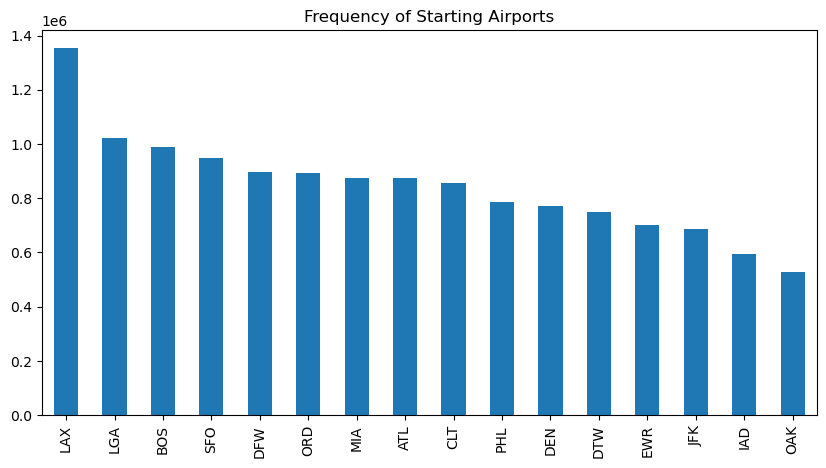

In [31]:
# Analyze Airports
data['startingAirport'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Frequency of Starting Airports')
plt.show()

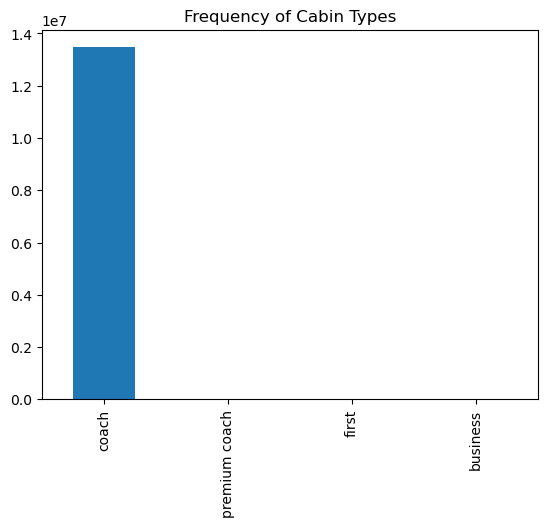

In [57]:
# Analyze Cabin Types
data['segmentsCabinCode_Leg1'].value_counts().plot(kind='bar')
plt.title('Frequency of Cabin Types')
plt.show()

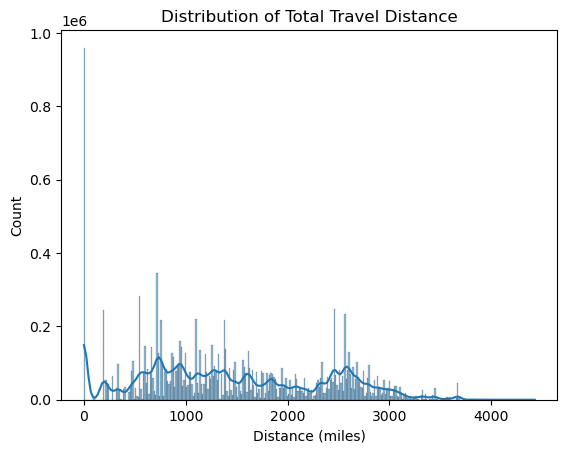

In [59]:
# Distribution of total travel distance
sns.histplot(data['totalTravelDistance'].dropna(), kde=True)  
plt.title('Distribution of Total Travel Distance')
plt.xlabel('Distance (miles)')
plt.show()

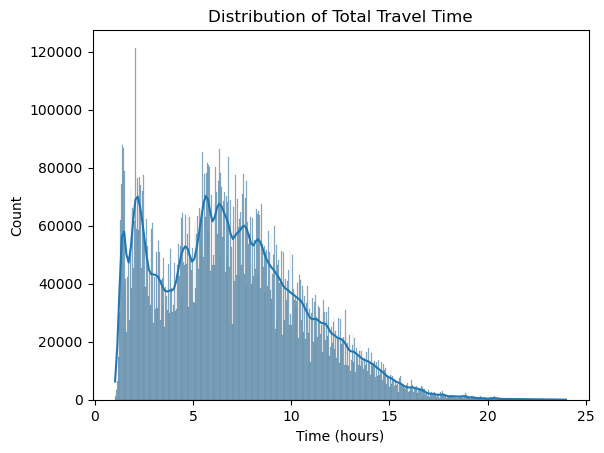

In [60]:
# Distribution of total travel time
sns.histplot(data['traveltime_hours'].dropna(), kde=True)  
plt.title('Distribution of Total Travel Time')
plt.xlabel('Time (hours)')
plt.show()

### 3. Distribution of Fare according to the Trip Distance.

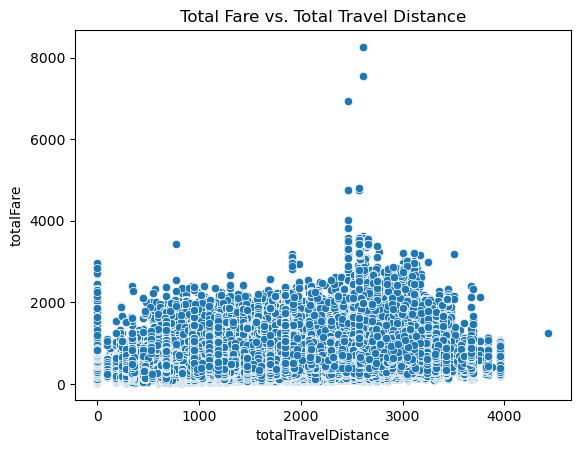

In [34]:
# Fare vs. Distance
sns.scatterplot(x='totalTravelDistance', y='totalFare', data=data)
plt.title('Total Fare vs. Total Travel Distance')
plt.show()

### 4. Analysing Fare Price by Day of the Week and Month

In [36]:
# Convert dates to datetime format for analysis
data['searchDate'] = pd.to_datetime(data['searchDate'])
data['flightDate'] = pd.to_datetime(data['flightDate'])

# Extract day of the week, month, and other temporal features
data['searchDayOfWeek'] = data['searchDate'].dt.day_name()
data['flightDayOfWeek'] = data['flightDate'].dt.day_name()
data['searchMonth'] = data['searchDate'].dt.month_name()
data['flightMonth'] = data['flightDate'].dt.month_name()

### Week

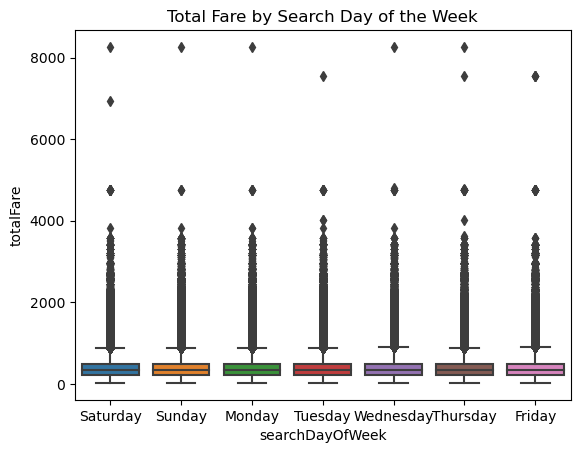

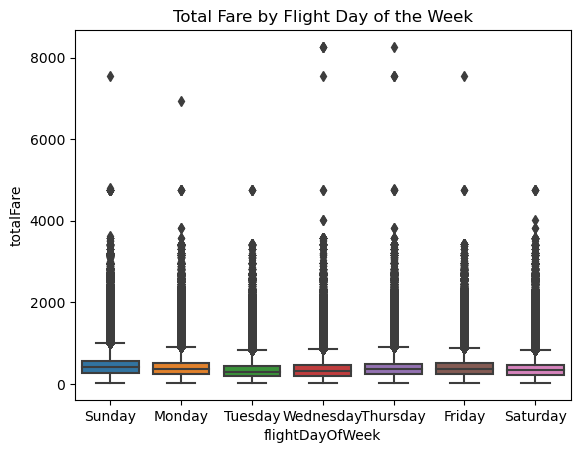

In [37]:
# Analyze fare prices by day of the week
sns.boxplot(x='searchDayOfWeek', y='totalFare', data=data)
plt.title('Total Fare by Search Day of the Week')
plt.show()

sns.boxplot(x='flightDayOfWeek', y='totalFare', data=data)
plt.title('Total Fare by Flight Day of the Week')
plt.show()


- The plotted graphs shows the distribution of fare accross the dats of the week and it can be oberseved that there is not significant difference in the distribution.

### Month

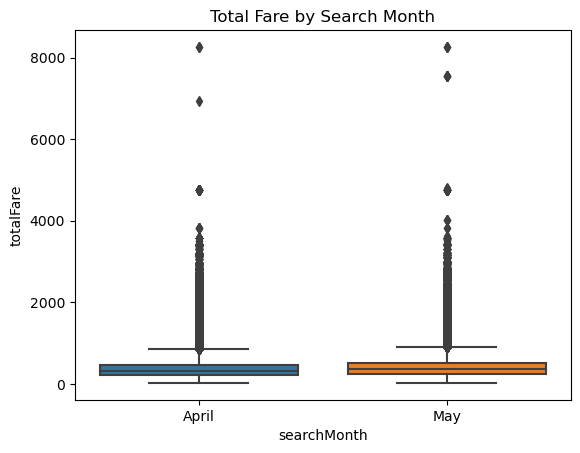

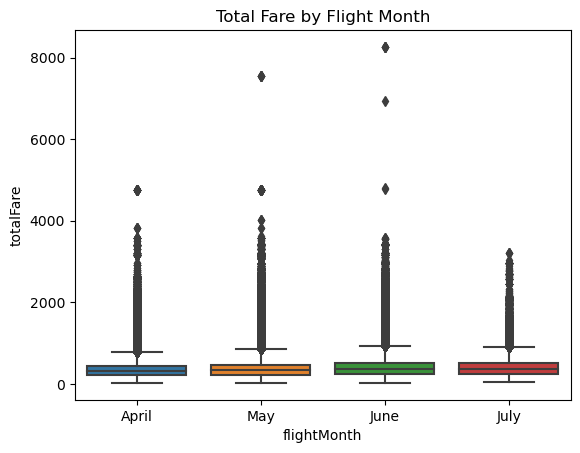

In [38]:
# Analyze fare prices by month
sns.boxplot(x='searchMonth', y='totalFare', data=data)
plt.title('Total Fare by Search Month')
plt.show()

sns.boxplot(x='flightMonth', y='totalFare', data=data)
plt.title('Total Fare by Flight Month')
plt.show()

- Similar observation can be made for the month plots. There is no significant difference in distribution accross the months

### 5. Top 10 Airports by Fare 

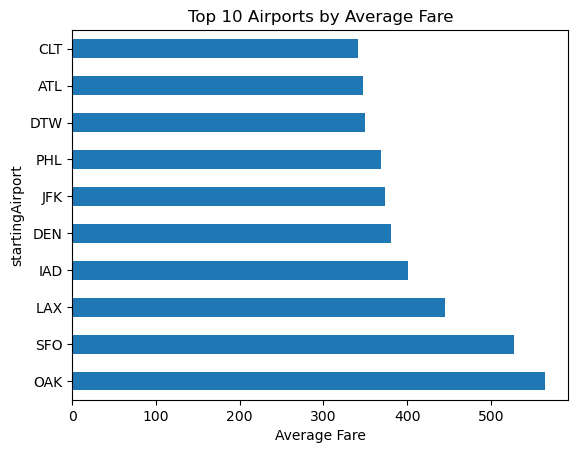

In [39]:
# Plot the top n airports by average fare
top_n = 10
avg_fare_per_airport = data.groupby('startingAirport')['totalFare'].mean().sort_values(ascending=False).head(top_n)
avg_fare_per_airport.plot(kind='barh')
plt.title(f'Top {top_n} Airports by Average Fare')
plt.xlabel('Average Fare')
plt.show()

### 6. Count of Cabin Type, Average Fare and Distribution of Flight Type Per Leg

#### Leg 1

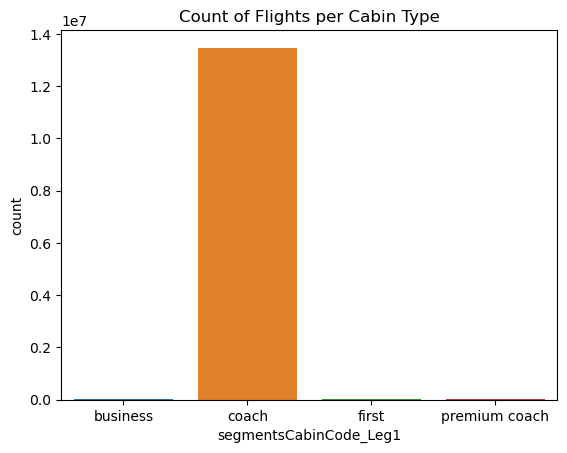

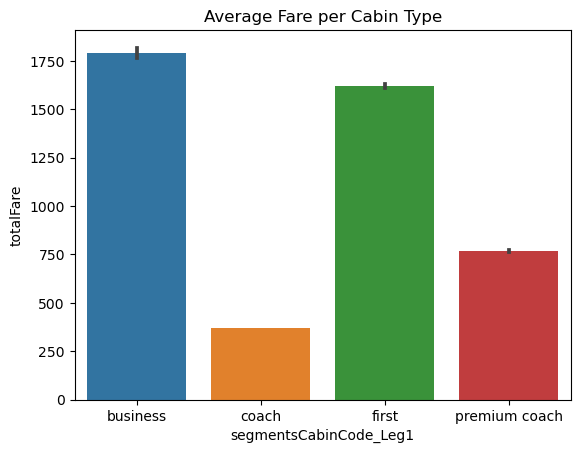

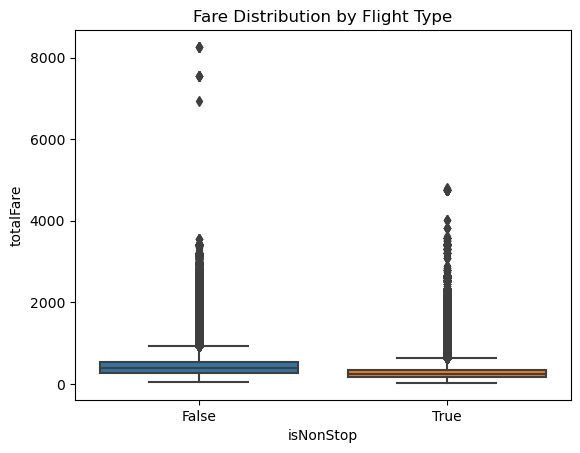

In [41]:
# Count of flights per cabin type
sns.countplot(x='segmentsCabinCode_Leg1', data=data)
plt.title('Count of Flights per Cabin Type')
plt.show()

# Average fare per cabin type
sns.barplot(x='segmentsCabinCode_Leg1', y='totalFare', data=data)
plt.title('Average Fare per Cabin Type')
plt.show()

# Fare distribution by non-stop vs multi-leg flights
sns.boxplot(x='isNonStop', y='totalFare', data=data)
plt.title('Fare Distribution by Flight Type')
plt.show()

#### Leg 2

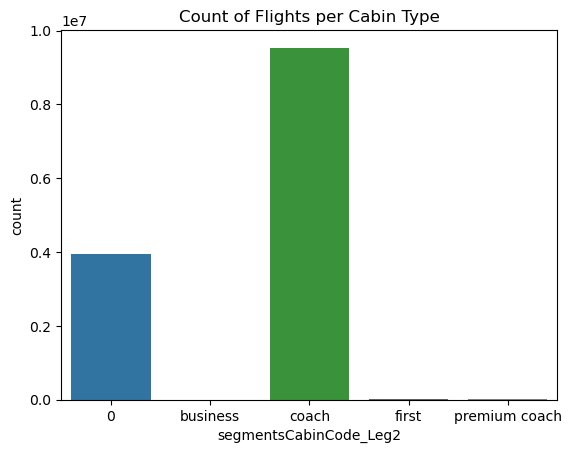

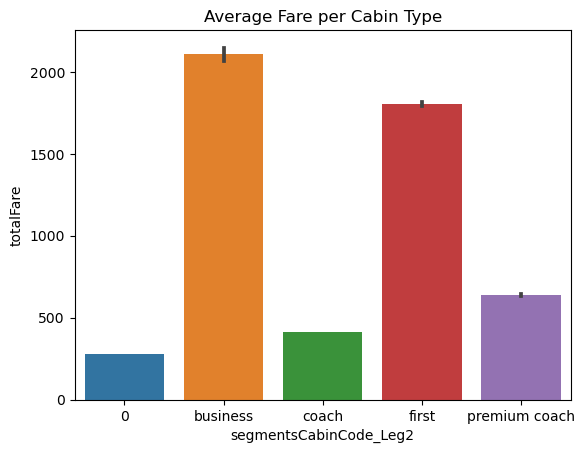

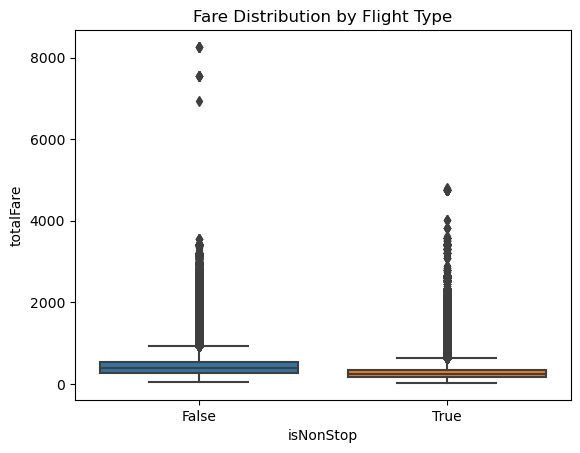

In [42]:
# Count of flights per cabin type
sns.countplot(x='segmentsCabinCode_Leg2', data=data)
plt.title('Count of Flights per Cabin Type')
plt.show()

# Average fare per cabin type
sns.barplot(x='segmentsCabinCode_Leg2', y='totalFare', data=data)
plt.title('Average Fare per Cabin Type')
plt.show()

# Fare distribution by non-stop vs multi-leg flights
sns.boxplot(x='isNonStop', y='totalFare', data=data)
plt.title('Fare Distribution by Flight Type')
plt.show()

#### Leg 3

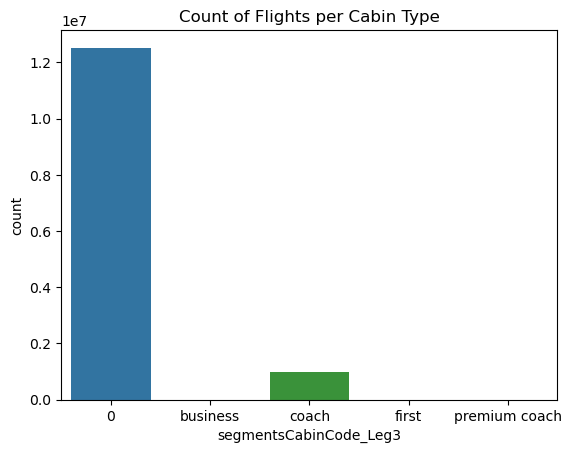

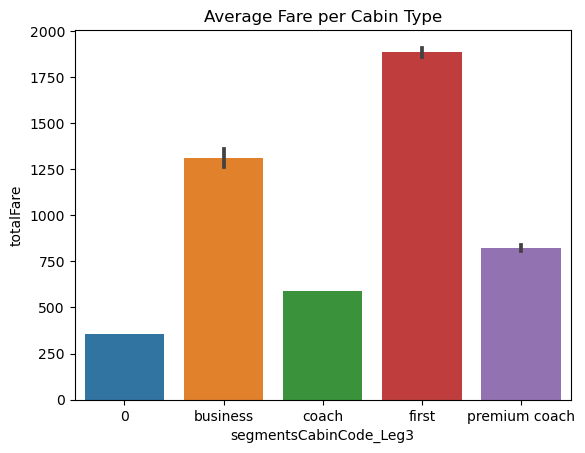

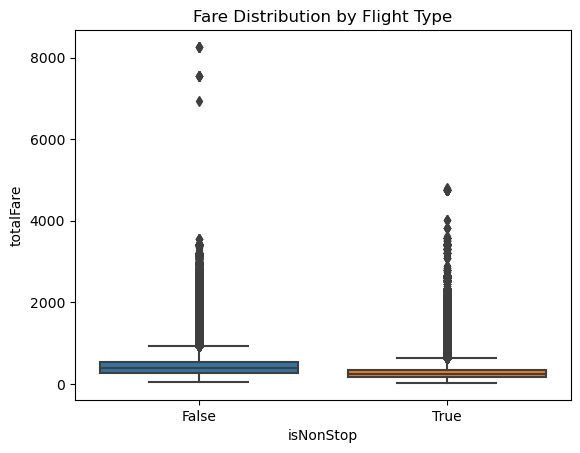

In [43]:
# Count of flights per cabin type
sns.countplot(x='segmentsCabinCode_Leg3', data=data)
plt.title('Count of Flights per Cabin Type')
plt.show()

# Average fare per cabin type
sns.barplot(x='segmentsCabinCode_Leg3', y='totalFare', data=data)
plt.title('Average Fare per Cabin Type')
plt.show()

# Fare distribution by non-stop vs multi-leg flights
sns.boxplot(x='isNonStop', y='totalFare', data=data)
plt.title('Fare Distribution by Flight Type')
plt.show()

#### Leg 4

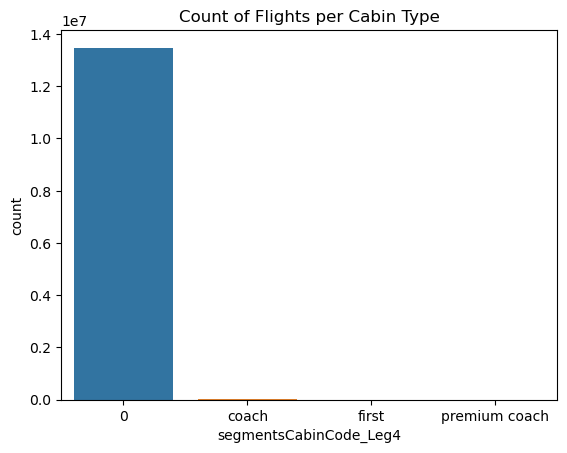

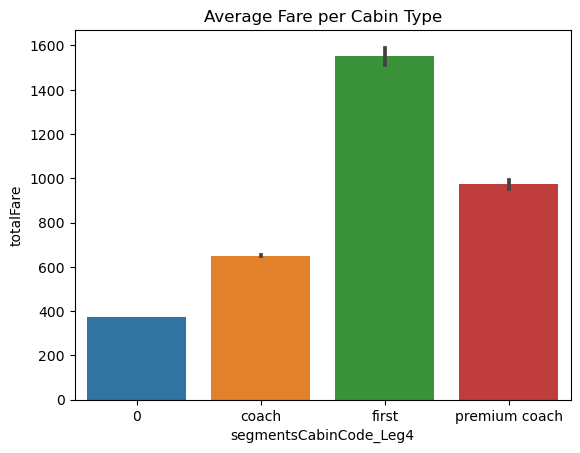

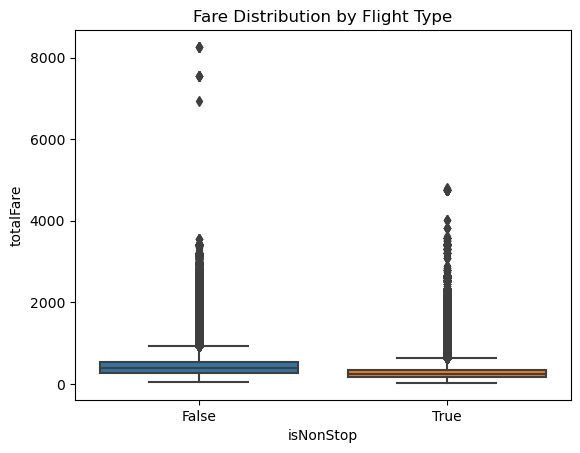

In [44]:
# Count of flights per cabin type
sns.countplot(x='segmentsCabinCode_Leg4', data=data)
plt.title('Count of Flights per Cabin Type')
plt.show()

# Average fare per cabin type
sns.barplot(x='segmentsCabinCode_Leg4', y='totalFare', data=data)
plt.title('Average Fare per Cabin Type')
plt.show()

# Fare distribution by non-stop vs multi-leg flights
sns.boxplot(x='isNonStop', y='totalFare', data=data)
plt.title('Fare Distribution by Flight Type')
plt.show()

### 6. Frequency of Flights per Airline per Leg 

#### Leg 1

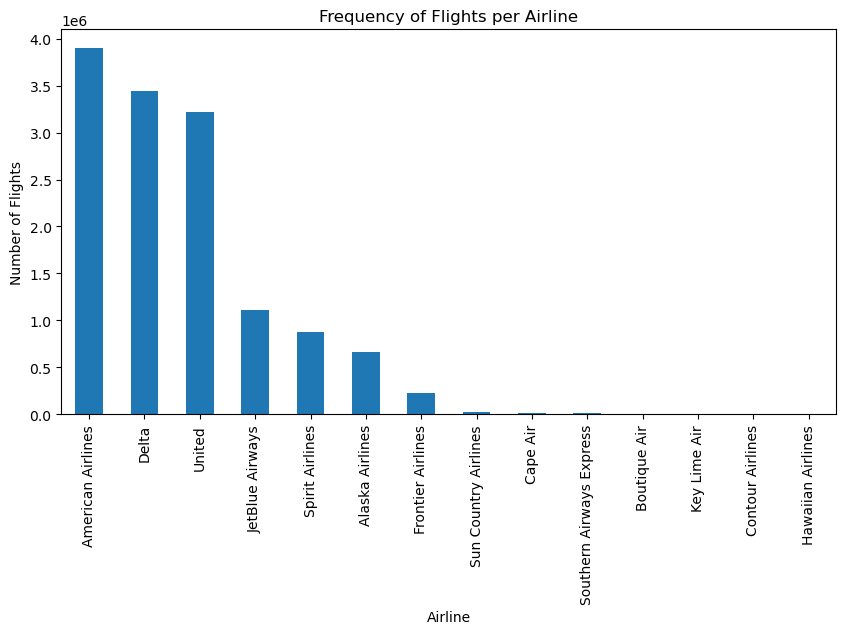

In [47]:
# Count the occurrences of each airline name
airline_counts = data['segmentsAirlineName_Leg1'].value_counts()

# Plot frequency of flights per airline
airline_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Frequency of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()

#### Leg 2

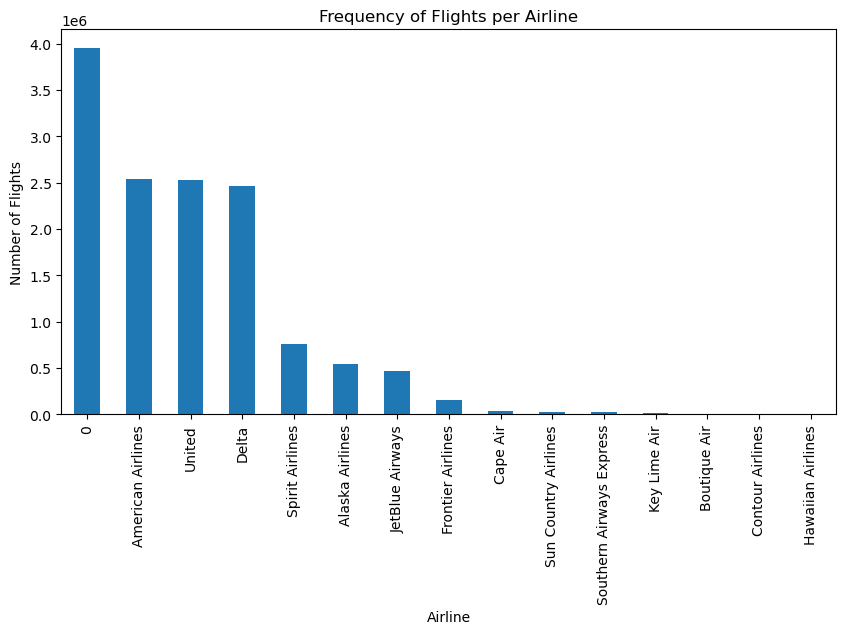

In [48]:
# Count the occurrences of each airline name
airline_counts = data['segmentsAirlineName_Leg2'].value_counts()

# Plot frequency of flights per airline
airline_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Frequency of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()

#### Leg 3

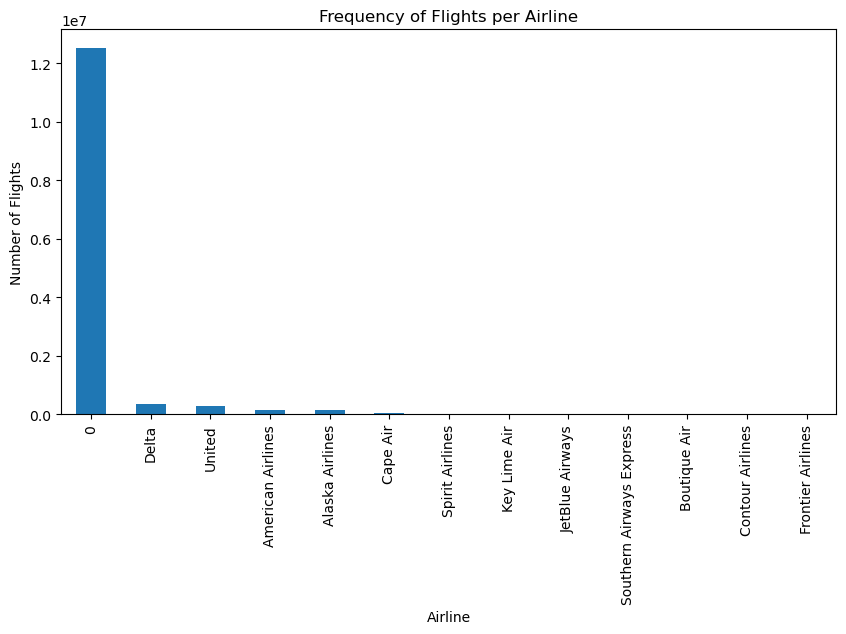

In [49]:
# Count the occurrences of each airline name
airline_counts = data['segmentsAirlineName_Leg3'].value_counts()

# Plot frequency of flights per airline
airline_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Frequency of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()

#### Leg 4

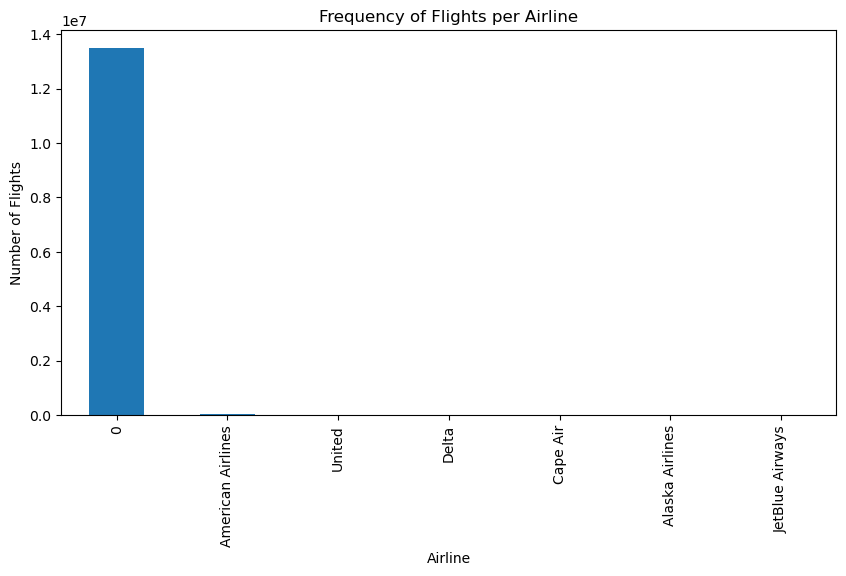

In [50]:
# Count the occurrences of each airline name
airline_counts = data['segmentsAirlineName_Leg4'].value_counts()

# Plot frequency of flights per airline
airline_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Frequency of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()

### Correlation Matrix

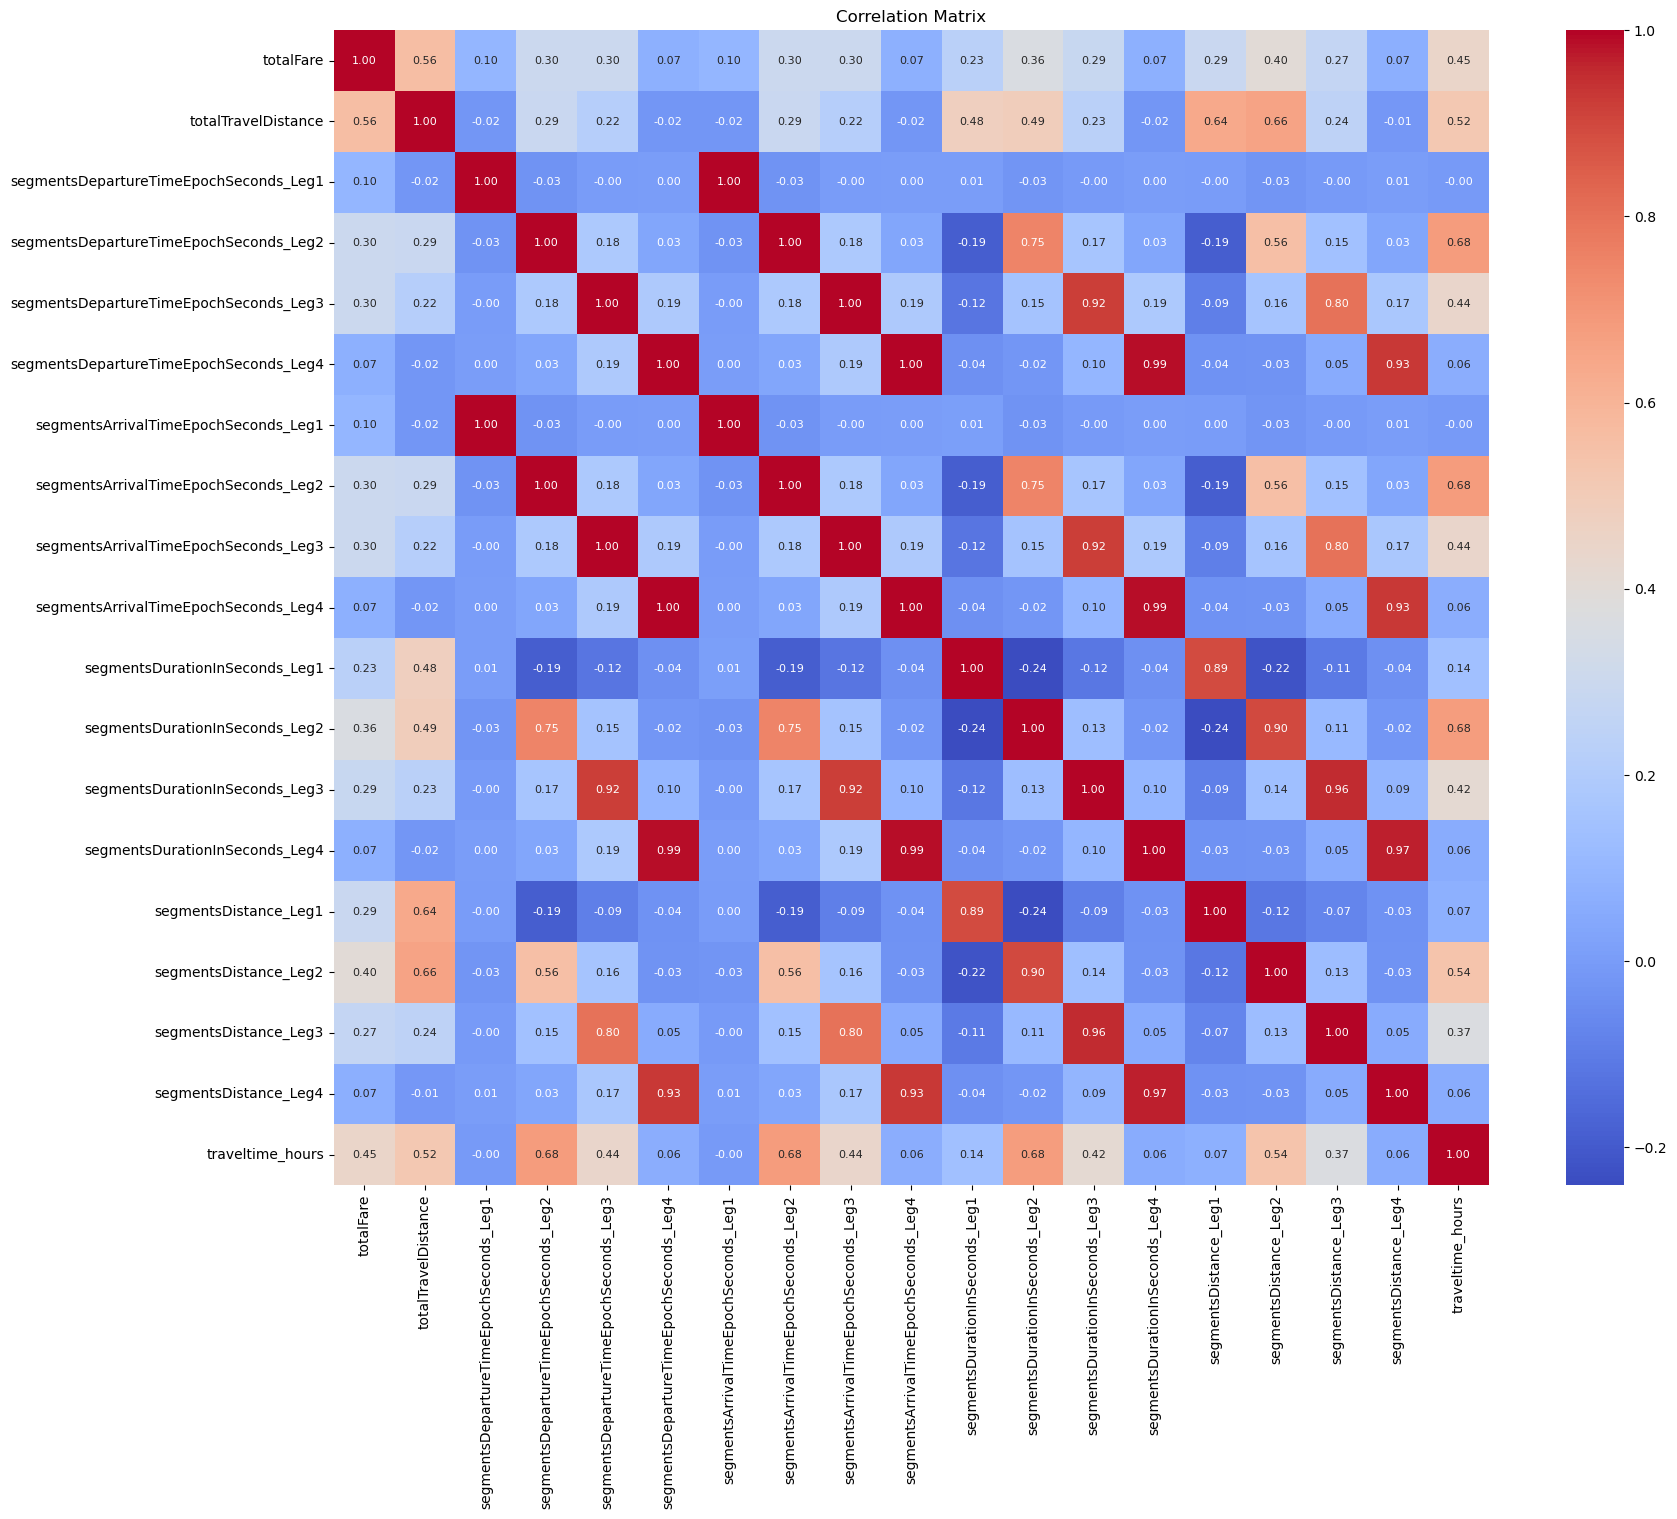

In [58]:
#Correlation Matrix
plt.figure(figsize=(20, 15))
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", 
            annot_kws={"size": 8}, square=True)

plt.xticks(rotation=90)

plt.yticks(rotation=0)

plt.title('Correlation Matrix')
plt.show()